

# Підготовка даних до аналізу






<h2>Мета</h2>

Ознайомитись з методикою первинної обробки даних. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати структуру завантажених даних
* Виправляти формати даних
* Знаходити та заповнювати пропуски в даних
* Знаходити викиди та некоректні значення
* Будувати прості візуалізації




<a name="task"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>





1. Скачати дані із файлу <a href="https://drive.google.com/file/d/1Vz4Kkbu4HVMuBKsOz_5gq3C8jYYXA89d/view?usp=drive_link" target="_blank">'Data2.csv'</a>. Записати дані у dataframe. Дослідити структуру даних.
2. Виправити помилки в даних.
3. Заповнити пропуски.
4. Додати стовпчик із щільністю населення.
5. Побудувати діаграми розмаху та гістограми.


<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити структуру даних</p>
</div>


Зчитую дані з файлу у датафрейм


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import pandas as pd
import numpy as np

df = pd.read_csv("Data2.csv", sep=';', encoding='cp1252')
print(df)

              Country Name                      Region GDP per capita  \
0              Afghanistan                  South Asia    561,7787463   
1                  Albania       Europe & Central Asia     4124,98239   
2                  Algeria  Middle East & North Africa    3916,881571   
3           American Samoa         East Asia & Pacific    11834,74523   
4                  Andorra       Europe & Central Asia    36988,62203   
..                     ...                         ...            ...   
212  Virgin Islands (U.S.)   Latin America & Caribbean            NaN   
213     West Bank and Gaza  Middle East & North Africa    2943,404534   
214            Yemen, Rep.  Middle East & North Africa     990,334774   
215                 Zambia          Sub-Saharan Africa    1269,573537   
216               Zimbabwe          Sub-Saharan Africa    1029,076649   

     Populatiion CO2 emission     Area  
0     34656032.0     9809,225   652860  
1      2876101.0     5716,853    28750  


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
DATA_PATH = 'data/Data2.csv'

# Зчитуємо файл із заданим розділяючим символом ";"
df = pd.read_csv(DATA_PATH, sep=';')

'''
Зауваження: попередній код зчитування з файлу підходить для
файлів з кодуванням utf-8. Проте файл Data2.csv спочатку мав інше
кодування. Дане кодування потрібно вказати в якості параметру:
    
'''

df = pd.read_csv(DATA_PATH, sep=';', encoding='cp1252')


```
</details>




Досліджую структуру даних


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df.info()
print(df.describe(include = "all"))
df

print("\n\nТипи даних:\n",df.dtypes)

print("\n\nКількість NaN:\n", df.isna().sum())

print('\n\nУнікальні записи у полі Region:\n', df['Region'].unique()) #тут все ок

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    object 
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    object 
 5   Area            217 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB
       Country Name                 Region GDP per capita   Populatiion  \
count           217                    217            190  2.160000e+02   
unique          217                      7            190           NaN   
top     Afghanistan  Europe & Central Asia    561,7787463           NaN   
freq              1                     58              1           NaN   
mean            NaN                    NaN            NaN  3.432256e+07   
std             NaN              

Бачу наступні проблеми в даних:
1. У назві одного з полів є typo: 'Populatiion'
2. Невідповідність значень типам даних (у полів 'GDP per capita', 'CO2 emission' та 'Area' тип object, хоча має бути float, у поля 'Population' тип даних float, хоча кількість населення не може бути дробовим числом).
3. Ця проблема буде виявлена після вирішення перших двух.
4. Є пропущені значення в ознаках 'GDP per capita', 'CO2 emission', та 'Populatiion'


<a name="task2"></a> <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2"> Завдання  #2: </h2>

<p>Виправити помилки в даних</p>
</div>


<b>Проблема 1.</b>
<p>
    Для виправлення зроблю наступне: зміню назву стовпця
</p>

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df.rename(columns={'Populatiion':'Population'}, inplace=True)
print(df)

              Country Name                      Region GDP per capita  \
0              Afghanistan                  South Asia    561,7787463   
1                  Albania       Europe & Central Asia     4124,98239   
2                  Algeria  Middle East & North Africa    3916,881571   
3           American Samoa         East Asia & Pacific    11834,74523   
4                  Andorra       Europe & Central Asia    36988,62203   
..                     ...                         ...            ...   
212  Virgin Islands (U.S.)   Latin America & Caribbean            NaN   
213     West Bank and Gaza  Middle East & North Africa    2943,404534   
214            Yemen, Rep.  Middle East & North Africa     990,334774   
215                 Zambia          Sub-Saharan Africa    1269,573537   
216               Zimbabwe          Sub-Saharan Africa    1029,076649   

     Population CO2 emission     Area  
0    34656032.0     9809,225   652860  
1     2876101.0     5716,853    28750  
2  

<b>Проблема 2.</b>
<p>
    Для виправлення зроблю наступне (опишіть, що хочете зробити)
</p>

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df['GDP per capita'] = df['GDP per capita'].str.replace(',', '.')
df[['GDP per capita']] = df[['GDP per capita']].astype('float')

df['CO2 emission'] = df['CO2 emission'].str.replace(',', '.')
df[['CO2 emission']] = df[['CO2 emission']].astype('float')

df = df[df['Area'].notna()]
df['Area'] = df['Area'].str.replace(',', '.')
df[['Area']] = df[['Area']].astype('float')

df = df[df['Population'].notna()]
df[['Population']] = df[['Population']].astype('int')

print("\n\nТипи даних:\n",df.dtypes)




Типи даних:
 Country Name       object
Region             object
GDP per capita    float64
Population          int64
CO2 emission      float64
Area              float64
dtype: object


<b>Проблема 3.</b>
<p>
    Для виявлення перевіримо чи всі дані є допутимими
</p>

In [ ]:
print(df[(df['Population'] <= 0) | (df['Area'] <= 0) | (df['CO2 emission'] <= 0) | (df['GDP per capita'] <= 0)])

           Country Name                     Region  GDP per capita  \
56   Dominican Republic  Latin America & Caribbean    -6722.223536   
135             Myanmar        East Asia & Pacific     1195.515372   

     Population  CO2 emission      Area  
56     10648791     21539.958   48670.0  
135    52885223     21631.633 -676590.0  


Проблема 3 полягає у тому, що значення 56 запису в полі 'GDP per capita' і 135 запису в полі 'Area' менше 0. Тобто дані невалідні.

Для вирішення цієї проблеми замінимо невалідні дані на NaN, а що із ними робити вирішемо в завданні #3.

In [ ]:
df.at[135, 'Area'] = np.nan
df.at[56, 'GDP per capita'] = np.nan

print(df.loc[56], '\n\n', df.loc[135])

Country Name             Dominican Republic
Region            Latin America & Caribbean
GDP per capita                          NaN
Population                         10648791
CO2 emission                      21539.958
Area                                48670.0
Name: 56, dtype: object 

 Country Name                  Myanmar
Region            East Asia & Pacific
GDP per capita            1195.515372
Population                   52885223
CO2 emission                21631.633
Area                              NaN
Name: 135, dtype: object


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3"> Завдання  #3: </h2>

<p>Заповнити пропуски</p>
</div>


У ознаки Population і Area відсутнє лише одне значення

In [ ]:
print(df[df['Population'].isna()])

   Country Name              Region GDP per capita  Population CO2 emission  \
61      Eritrea  Sub-Saharan Africa            NaN         NaN       696,73   

      Area  
61  117600  
Empty DataFrame
Columns: [Country Name, Region, GDP per capita, Population, CO2 emission, Area]
Index: []


In [ ]:
print(df[df['Area'].isna()])

    Country Name               Region  GDP per capita  Population  \
135      Myanmar  East Asia & Pacific     1195.515372    52885223   

     CO2 emission  Area  
135     21631.633   NaN  


У запису під номером 61 також відсутню значення ознаки GDP per capita. Знайдемо пропущені поля цих країн в інтернеті.

**Еритрея**

Населення: 3.684 млн = 3684000

ВВП на душу населення: 643,79


**М'янма**

Площа: 676578

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df.at[61, 'Population'] = 3684000
df.at[61, 'GDP per capita'] = 643.79

df.at[135, 'Area'] = 676578

print(df.loc[61],'\n\n', df.loc[135])

Country Name                 Eritrea
Region            Sub-Saharan Africa
GDP per capita                643.79
Population                   3684000
CO2 emission                  696.73
Area                        117600.0
Name: 61, dtype: object 

 Country Name                  Myanmar
Region            East Asia & Pacific
GDP per capita            1195.515372
Population                   52885223
CO2 emission                21631.633
Area                         676578.0
Name: 135, dtype: object


Обчислимо середнє арифметичне мат. сподівання відношення площі до викидів СО2 і кількості населення до викидів СО2. За цією величиною визначимо кількість викидів у пропущених даних.

In [ ]:
for_co2 = ((df['Area']/df['CO2 emission']).mean() + (df['Population']/df['CO2 emission']).mean())/2

print(for_co2)

897.0671670946242


Маємо формулу для знаходження викидів вуглекислого газу

CO2 emission = (Area+Population)/(2*for_co2)

In [ ]:
df['CO2 emission'] = df['CO2 emission'].fillna((df['Area'] + df['Population']) / (2 * for_co2))

In [ ]:
print("\n\nКількість NaN:\n", df.isna().sum())



Кількість NaN:
 Country Name       0
Region             0
GDP per capita    27
Population         0
CO2 emission       0
Area               0
dtype: int64


Пропущені дані для GDP визначимо таким самим чином

In [ ]:
for_gdp = ((df['Area']/df['GDP per capita']).mean() + (df['Population']/df['GDP per capita']).mean())/2

df['GDP per capita'] = df['GDP per capita'].fillna((df['Area'] + df['Population']) / (2 * for_gdp))

Досліджую структуру даних, чи всі пропуски заповнено


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print("\n\nКількість NaN:\n", df.isna().sum())



Кількість NaN:
 Country Name      0
Region            0
GDP per capita    0
Population        0
CO2 emission      0
Area              0
dtype: int64


 <a name="task4"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4"> Завдання  #4: </h2>

<p>Додати стовпчик із щільністю населення</p>
</div>


Щільність населення розрахую по формулі Population/Area і додам у стовпчик Density.


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df['Density'] = df['Population']/df['Area']
print(df)

              Country Name                      Region  GDP per capita  \
0              Afghanistan                  South Asia      561.778746   
1                  Albania       Europe & Central Asia     4124.982390   
2                  Algeria  Middle East & North Africa     3916.881571   
3           American Samoa         East Asia & Pacific    11834.745230   
4                  Andorra       Europe & Central Asia    36988.622030   
..                     ...                         ...             ...   
212  Virgin Islands (U.S.)   Latin America & Caribbean        6.327732   
213     West Bank and Gaza  Middle East & North Africa     2943.404534   
214            Yemen, Rep.  Middle East & North Africa      990.334774   
215                 Zambia          Sub-Saharan Africa     1269.573537   
216               Zimbabwe          Sub-Saharan Africa     1029.076649   

     Population   CO2 emission       Area     Density  
0      34656032    9809.225000   652860.0   53.083405  

<a name="task5"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5"> Завдання  #5: </h2>

<p>Побудувати діаграми розмаху та гістограми</p>
</div>


Для побудови графіків скористайтесь бібліотекою Matplotlib. Спробуйте погратись з кольорами, розмірами та підписами.


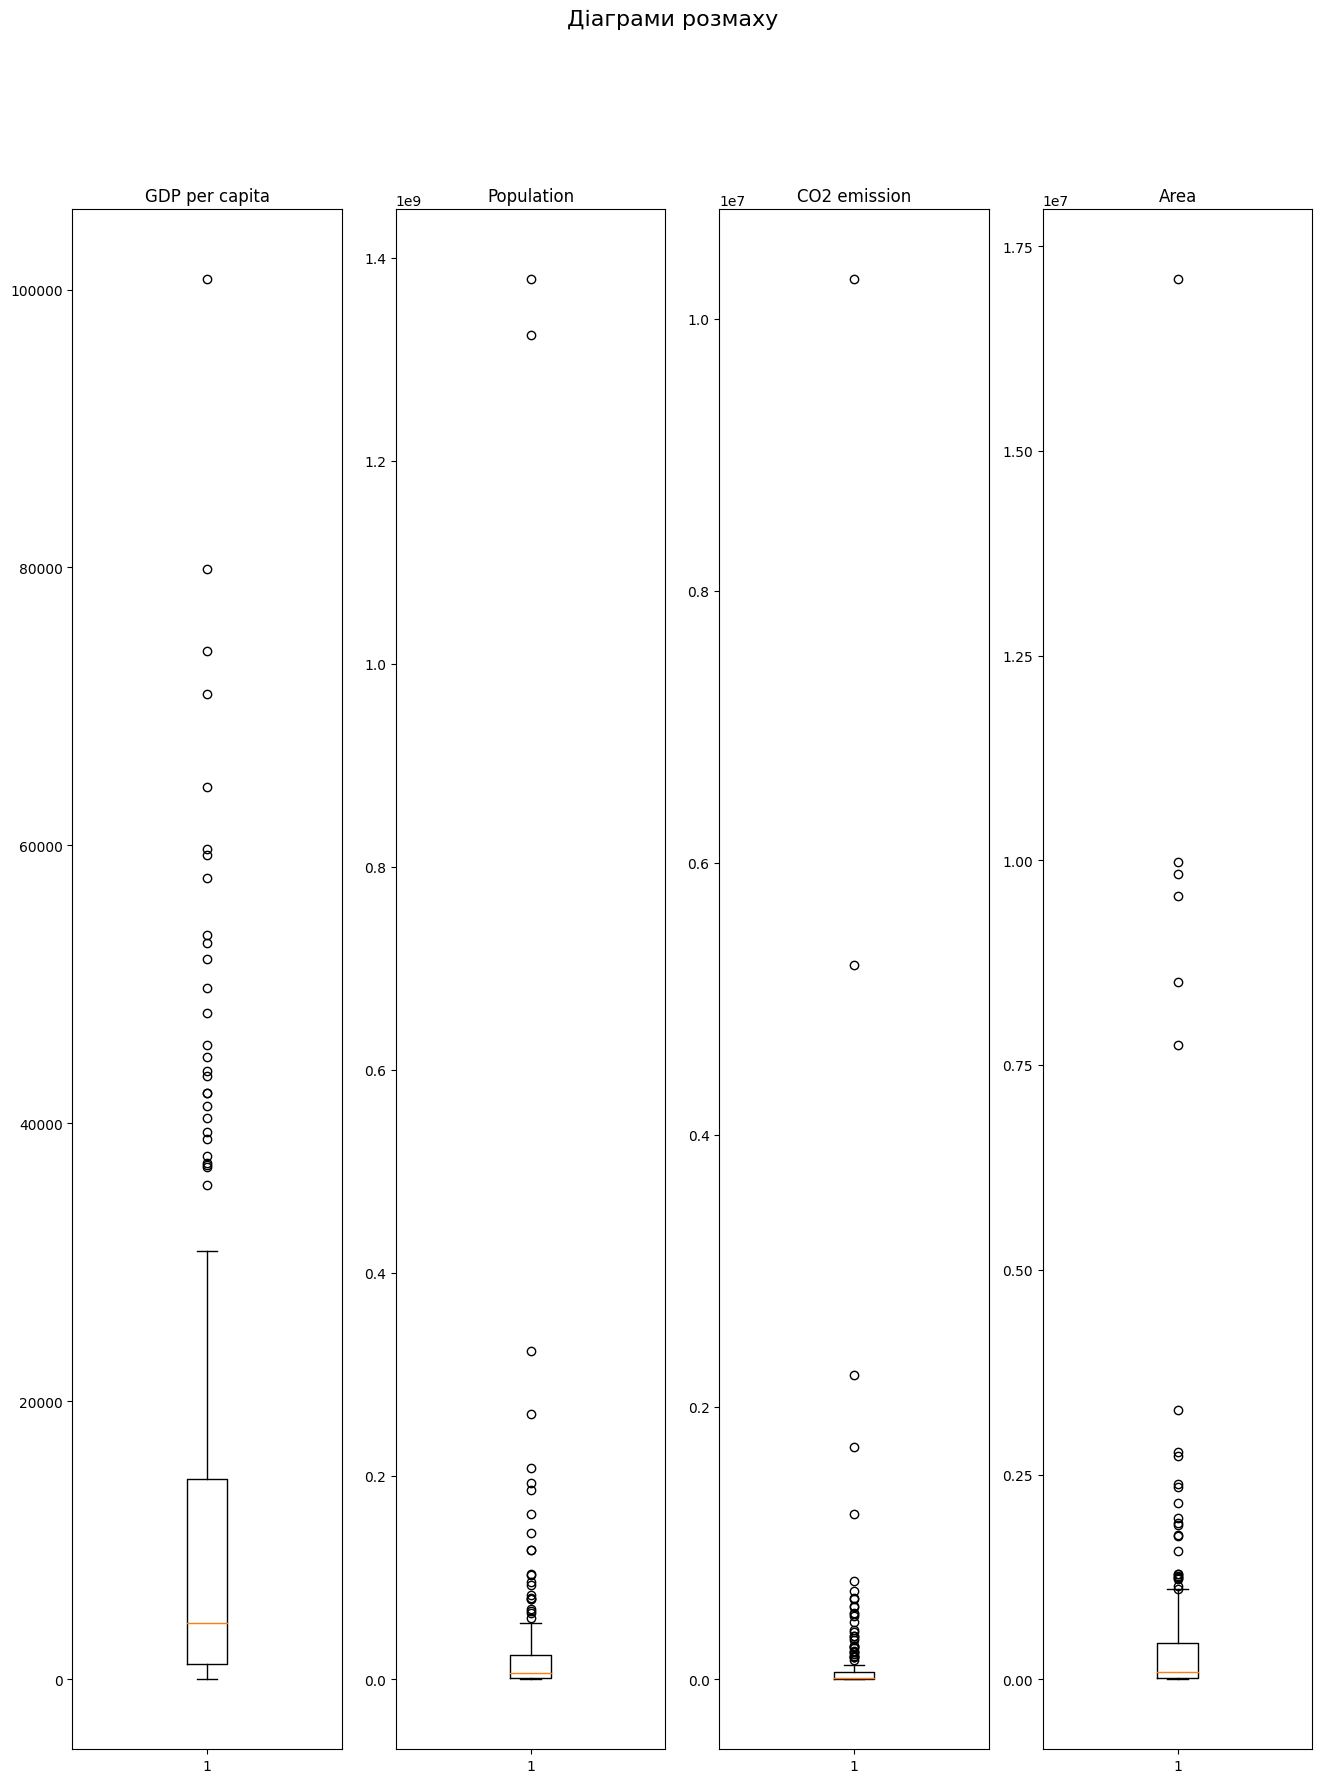

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(16, 20))

fig.suptitle('Діаграми розмаху', fontsize=16)

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'])

axs[1].set_title('Population')
axs[1].boxplot(df['Population'])

axs[2].set_title('CO2 emission')
axs[2].boxplot(df['CO2 emission'])

axs[3].set_title('Area')
axs[3].boxplot(df['Area'])

plt.show()

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Імпортуємо бібліотеку Matplotlib
import matplotlib.pyplot as plt
    
# діаграми розмаху для "GDP per capita", "Population", "CO2 emission" та "Area"

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

fig.suptitle('Діаграми розмаху', fontsize=16)

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'])

axs[1].set_title('Population')
axs[1].boxplot(df['Population'])

axs[2].set_title('CO2 emission')
axs[2].boxplot(df['CO2 emission'])

axs[3].set_title('Area')
axs[3].boxplot(df['Area'])

plt.show()

```
</details>




<a name="task6"></a>
 <div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. Яка країна має найбільший ВВП на людину (GDP per capita)?
2. Яка країна має найменшу площу?
3. Знайдіть країну з найбільшою щільністю населення у світі? У Європі та центральній Азії?
4. Покажіть топ 5 країн та 5 останніх країн по ВВП на людину.



<details><summary>Натисніть тут, щоб побачити підказку</summary>
    
Скористайтесь методами <code>loc()</code> для повернення зрізу датафрейму, <code>idxmax()</code> для повернення номера рядка з найбільшим значенням якогось показника у стовпці та <code>idxmin()</code> для повернення номера рядка з найменшим значенням якогось показника у стовпці
    
```python
df.loc[df['GDP per capita'].idxmax()]

```
    
Гарно оформити виведення інформації допоможе <code>print()</code>  
```python
print('\n' + df.loc[df['GDP per capita'].idxmax(), 'Country Name'] + ' має найбільший ВВП на людину')
```   
  
</details>


In [ ]:
# 1
print('\n' + df.loc[df['GDP per capita'].idxmax(), 'Country Name'] + ' має найбільший ВВП на людину')


Luxembourg має найбільший ВВП на людину


In [ ]:
#2
print('\n' + df.loc[df['Area'].idxmin(), 'Country Name'] + ' має найменшу площу')


Monaco має найменшу площу


In [ ]:
#3
print('\n' + df.loc[df['Density'].idxmax(), 'Country Name'] + ' має найбільшу щільність населення у світі')
print('\n' + df[df['Region'] == 'Europe & Central Asia'].loc[df[df['Region'] == 'Europe & Central Asia']['Density'].idxmax(), 'Country Name'] + ' має найбільшу щільність населення у Європі та центральній Азії')


Macao SAR, China має найбільшу щільність населення у світі

Monaco має найбільшу щільність населення у Європі та центральній Азії


Збережіть дані у новий файл 'clean_data2.csv':


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df.to_csv('clean_data2.csv', index=False)

<h2>Виконав студент групи ІП-24  <br>Новиков Гліб</h2>
